In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import warnings

### Gather

In [2]:
# Reading csv file to dataframe

twitter_csv = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Downloading tsv file from website and reading to dataframe

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

twitter_tsv = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Authentication

consumer_key = 'zE7vOgPegSYo8Yj8gHE3NRes7'
consumer_secret = 'cVdR14vWg0b0WcBTllzBIHrkPBBUifbDkDRd9POo41UUdLEna9'
access_token = '87888307-vpLXIsmWYJ4JoHBsEwqtqVIdqMM1lxn8MAko0CaHp'
access_secret = '4J5pys9lgNHD2pVyLaeTwNHBpoKSCeJhi0suk4nO0IkXN'

In [5]:
# Creating API Object

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
# Adding each tweet to a file

with open('retweet_count.txt', 'a', encoding='utf8') as rc:
    for tweet_id in twitter_csv['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, rc)
            rc.write('\n')
        except:
            continue

In [7]:
# Creating a tweets list

count_data = []

tweet_file = open('retweet_count.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        count_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [8]:
# Adding tweets to dataframe

tweet_df = pd.DataFrame()
tweet_df['id'] = list(map(lambda tweet: tweet['id'], count_data))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], count_data))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], count_data))

Three dataframes from different sources are:

twitter_csv, twitter_tsv and tweet_df

### Assess

In [9]:
twitter_csv.head(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25 01:55:32 +0000   
13  2017-07-25 00:10:02 +0000   
14  2017-07-24 17:02:04 +0000   
15  2017-07-24 00:19:32 +0000   
16  2017-07-23 00:22:39 +0000   
17  2017-07-22 16:56:37 +0000   
18  2017-07-22 00:23:06 +0000   
19  2017-07-21 01:02:36 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
0   This is Phineas. He's a mystical boy. Only eve...                  NaN   
1   This is Tilly. She's just checking pup on you....                  NaN   
2   This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3   This is Darla. She commenced a snooze mid meal...                  NaN   
4   This is Franklin. He would like you to stop ca...                  NaN   
5   Here we have a majestic great white breaching ...                  NaN   
6   Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7   When you watch your own

In [10]:
twitter_csv.tail(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2336  2015-11-16 15:14:19 +0000   
2337  2015-11-16 14:57:41 +0000   
2338  2015-11-16 04:02:55 +0000   
2339  2015-11-16 03:55:04 +0000   
2340  2015-11-16 03:44:34 +0000   
2341  2015-11-16 03:22:39 +0000   
2342  2015-11-16 02:38:37 +0000   
2343  2015-11-16 01:59:36 +0000   
2344  2015-11-16 01:52:02 +0000   
2345  2015-11-16 01:22:45 +0000   
2346  2015-11-16 01:01:59 +0000   
2347  2015-11-16 00:55:59 +0000   
2348  2015-11-16 00:49:46 +0000   
2349  2015-11-16 00:35:11 +0000   
2350  2015-11-16 00:30:50 +0000   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2336  <a href="http://twitter.com/download/iphone" r...   
2337  <a href="http://twitter.com/download/iphone" r...   
2338  <a href="http://twitter.com/download/iphone" r...   
2339  <a href="http://twitter.com/download/iphone" r...   
2340  <a href="http://twitter.com/download/iphone" r...   
2341  <a href="http://twitter.com/download/iphone" r...   
2342  <a href="http://twitter.com/download/iphone" r...   
2343  <a href="http://twitter.com/download/iphone" r...   
2344  <a href="http://twitter.com/download/iphone" r...   
2345  <a href="http://twitter.com/download/iphone" r...   
2346  <a href="http://twitter.com/download/iphone" r...   
2347  <a href="http://twitter.com/download/iphone" r...   
2348  <a href="http://twitter.com/download/iphone" r...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2336     Can take selfies 11/10 https://t.co/ws2AMaNwPW                  NaN   
2337  Very concerned about fellow dog trapped in com...                  NaN   
2338  Not familiar with this breed. No tail (weird)....                  NaN   
2339  Oh my. Here you are seeing an Adobe Setter giv...                  NaN   
2340  Can stand on stump for what seems like a while...                  NaN   
2341  This appears to be a Mongolian Presbyteri

In [11]:
twitter_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_csv.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
915   757354760399941633                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
1990  672640509974827008                    NaN                  NaN   
699   786286427768250368                    NaN                  NaN   
1051  742534281772302336                    NaN                  NaN   
938   753294487569522689                    NaN                  NaN   
350   831552930092285952                    NaN                  NaN   
958   751456908746354688                    NaN                  NaN   
167   859851578198683649                    NaN                  NaN   
663   790946055508652032                    NaN                  NaN   
1747  679111216690831360                    NaN                  NaN   
423   821765923262631936                    NaN                  NaN   
441   819711362133872643                    NaN                  NaN   
2233  668204964695683073                    NaN                  NaN   
1577  687399393394311168                    NaN                  NaN   
444   819238181065359361                    NaN                  NaN   
255   844223788422217728                    NaN                  NaN   
89    875021211251597312                    NaN                  NaN   
593   798925684722855936                    NaN                  NaN   
562   802600418706604034                    NaN                  NaN   

                      timestamp  \
915   2016-07-24 23:20:20 +0000   
194   2017-04-21 02:22:29 +0000   
1990  2015-12-04 04:56:09 +0000   
699   2016-10-12 19:24:27 +0000   
1051  2016-06-14 01:49:03 +0000   
938   2016-07-13 18:26:16 +0000   
350   2017-02-14 17:17:22 +0000   
958   2016-07-08 16:44:23 +0000   
167   2017-05-03 19:26:06 +0000   
663   2016-10-25 16:00:09 +0000   
1747  2015-12-22 01:28:25 +0000   
423   2017-01-18 17:07:18 +0000   
441   2017-01-13 01:03:12 +0000   
2233  2015-11-21 23:10:52 +0000   
1577  2016-01-13 22:22:41 +0000   
444   2017-01-11 17:42:57 +0000   
255   2017-03-21 16:26:50 +0000   
89    2017-06-14 16:04:48 +0000   
593   2016-11-16 16:28:21 +0000   
562   2016-11-26 19:50:26 +0000   

                                                 source  \
915   <a href="http://twitter.com/download/iphone" r...   
194   <a href="http://twitter.com/download/iphone" r...   
1990  <a href="http://twitter.com/download/iphone" r...   
699   <a href="http://vine.co" rel="nofollow">Vine -...   
1051  <a href="http://vine.co" rel="nofollow">Vine -...   
938   <a href="http://twitter.com/download/iphone" r...   
350   <a href="http://twitter.com/download/iphone" r...   
958   <a href="http://twitter.com/download/iphone" r...   
167   <a href="http://twitter.com/download/iphone" r...   
663   <a href="http://twitter.com/download/iphone" r...   
1747  <a href="http://twitter.com/download/iphone" r...   
423   <a href="http://twitter.com/download/iphone" r...   
441   <a href="http://twitter.com/download/iphone" r...   
2233  <a href="http://twitter.com/download/iphone" r...   
1577  <a href="http://vine.co" rel="nofollow">Vine -...   
444   <a href="http://twitter.com" rel="nofollow">Tw...   
255   <a href="http://twitter.com/download/iphone" r...   
89    <a href="http://twitter.com/download/iphone" r...   
593   <a href="http://twitter.com/download/iphone" r...   
562   <a href="http://vine.co" rel="nofollow">Vine -...   

                                                   text  retweeted_status_id  \
915   This is Devón (pronounced "Eric"). He forgot h...                  NaN   
194   RT @dog_rates: Meet George. He looks slightly ...         8.421635e+17   
1990  This is Leonidas. He just got rekt by a snowba...                  NaN   
699   This is Arnie. He's afraid of his own bark. 12...                  NaN   
1051  For anyone who's wondering, this is what happe...                  NaN   
938   This is Ace. He's a window washer. One of

In [13]:
twitter_tsv.head(20)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   

    img_num                      p1   p1_conf  p1_dog                  p2  \
0         1  Welsh_springer_spaniel  0.465074    True              collie   
1         1                 redbone  0.506826    True  miniature_pinscher   
2         1         German_shepherd  0.596461    True            malinois   
3         1     Rhodesian_ridgeback  0.408143    True             redbone   
4         1      miniature_pinscher  0.560311    True          Rottweiler   
5         1    Bernese_mountain_dog  0.651137    True    English_springer   
6         1              box_turtle  0.933012   False          mud_turtle   
7         1                    chow  0.692517    True     Tibetan_mastiff   
8         1           shopping_cart  0.962465   False     shopping_basket   
9         1        miniature_poodle  0.201493    True            komondor   
10        1        golden_retriever  0.775930    True     Tibetan_mastiff   
11        1           Gordon_setter  0.503672    True   Yorkshire_terrier   
12        1            Walker_hound  0.260857    True    English_foxhound   
13        1                     pug  0.489814    True        bull_mastiff   
14        1              bloodhound  0.195217    True     German_shepherd   
15        1                   Lhasa  0.582330    True            Shih-Tzu   
16        1          English_setter  0.298617    True        Newfoundland   
17        1                     hen  0.965932   False                cock   
18        1        desktop_computer  0.086502   False                desk   
19        1       Italian_greyhound  0.176053    True         toy_terrier   

     p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0   0.156665    True            Shetland_sheepdog  0.061428    True  
1   0.074192    True          Rhodesian_ridgeback  0.072010    True  
2   0.138584    True                   bloodhound  0.116197    True  
3   0.360687    True           miniature_pinscher  0.222752    True  
4   0.243682    True                     Doberman  0.154629    True  
5   0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6   0.045885   False                     terrapin  0.017885   False  
7   0.058279    True                     fur_coat  0.054449   False  
8   0.014594   False             golden_retriever  0.007959    True  
9   0.192305    True  soft-coated_wheaten_terrier  0.082086    True  
10  0.093718    True           Labrador_retriever 

In [14]:
twitter_tsv.tail(20)

tweet_id                                            jpg_url  \
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg   
2064  890006608113172480    https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg   
2065  890240255349198849    https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg   
2066  890609185150312448    https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg   
2067  890729181411237888    https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg   
2068  890971913173991426    https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg   
2069  891087950875897856    https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
2070  891327558926688256    https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688    https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864    https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426    https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                        p1   p1_conf  p1_dog  \
2055        2                  Pembroke  0.809197    True   
2056        3            Siberian_husky  0.700377    True   
2057        1          golden_retriever  0.469760    True   
2058        1          golden_retriever  0.714719    True   
2059        1                   whippet  0.626152    True   
2060        1          golden_retriever  0.953442    True   
2061        1            French_bulldog  0.991650    True   
2062        1                  Pembroke  0.966327    True   
2063        1            French_bulldog  0.377417    True   
2064        1                   Samoyed  0.957979    True   
2065        1                  Pembroke  0.511319    True   
2066        1             Irish_terrier  0.487574    True   
2067        2                Pomeranian  0.566142    True   
2068        1               Appenzeller  0.341703    True   
2069        1  Chesapeake_Bay_retriever  0.425595    True   
2070        2                    basset  0.555712    True   
2071        1               paper_towel  0.170278   False   
2072        1                 Chihuahua  0.716012    True   
2073        1                 Chihuahua  0.323581    True   
2074        1                    orange  0.097049   False   

                       p2   p2_conf  p2_dog                           p3  \
2055  Rhodesian_ridgeback  0.054950    True                       beagle   
2056           Eskimo_dog  0.166511    True                     malamute   
2057   Labrador_retriever  0.184172    True               English_setter   
2058      Tibetan_mastiff  0.120184    True           Labrador_retriever   
2059               borzoi  0.194742    True                       Saluki   
2060   Labrador_retriever  0.013834    True                      redbone   
2061                boxer  0.002129    True    Staffordshire_bullterrier   
2062             Cardigan  0.027356    True                      basenji   
2063   Labrador_retriever  0.151317    True                       muzzle   
2064           Pomeranian  0.013884    True                         chow   
2065             Cardigan  0.451038    True                    Chihuahua   
2066         Irish_setter  0.193054    True     Chesapeake_Bay_retriever   
2067           Eskimo_dog  0.178406    True                     Pembroke   
2068      

In [15]:
twitter_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweet_df.head(20)

id  retweet_count  favorite_count
0   892420643555336193           8389           38272
1   892177421306343426           6192           32801
2   891815181378084864           4098           24701
3   891689557279858688           8525           41596
4   891327558926688256           9238           39778
5   891087950875897856           3072           19958
6   890971913173991426           2039           11686
7   890729181411237888          18622           64605
8   890609185150312448           4213           27437
9   890240255349198849           7284           31490
10  890006608113172480           7232           30262
11  889880896479866881           4906           27420
12  889665388333682689           9923           47502
13  889638837579907072           4482           26816
14  889531135344209921           2210           14904
15  889278841981685760           5310           24926
16  888917238123831296           4438           28708
17  888804989199671297           4240           25235
18  888554962724278272           3504           19585
19  888078434458587136           3448           21472

In [17]:
tweet_df.tail(20)

id  retweet_count  favorite_count
4417  760539183865880579           3947            8064
4418  760521673607086080           1520            4502
4419  760290219849637889          12500           28557
4420  760252756032651264            942            4193
4421  760190180481531904           1971            6078
4422  760153949710192640             34               0
4423  759943073749200896           2278            6325
4424  759923798737051648           6182           15632
4425  759846353224826880           2159            7162
4426  759793422261743616           2069            6346
4427  759566828574212096          22998               0
4428  759557299618865152           1275            5009
4429  759447681597108224           2667            9037
4430  759446261539934208            530            1780
4431  759197388317847553           2116            6456
4432  759159934323924993           1271               0
4433  759099523532779520           4541           15484
4434  759047813560868866           2192            6941
4435  758854675097526272            973            3781
4436  758828659922702336           4169           11901

In [18]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Data columns (total 3 columns):
id                4437 non-null int64
retweet_count     4437 non-null int64
favorite_count    4437 non-null int64
dtypes: int64(3)
memory usage: 104.1 KB


#### Quality

- In 'twitter_csv' some of the entries in name column are in upper case while some are in lower case.
- In 'twitter_csv' incomplete tweet text is being displayed.
- In 'twitter_csv' some of the tweets have entries in retweeted_status_id and retweeted_status_user_id columns.
- In 'twitter_tsv' dog breeds in P1, P2 and P3 columns are written in different case (Some in upper case and some in lower case).
- In 'twitter_tsv', some of the dog breeds have _. 
- Some tweets don't seem to have images.
- Some tweets in 'twitter_csv' are showing &amp instead of & in text column.
- 'twitter_csv' has incorrect data type for timestamp.

#### Tidiness

- Dog stage is mentioned in 4 columns.
- Data that can be displayed in single table is scattered in 3 tables.

### Clean

In [19]:
# Creating copies of data files

twitter_csv_clean = twitter_csv.copy()
twitter_tsv_clean = twitter_tsv.copy()
tweet_df_clean = tweet_df.copy()

#### Define

- Replace multiple Dog Stage columns with a single Dog Stage column

#### Code

In [20]:
# Create a dog_stage variable accepting values from individual columns

twitter_csv_clean['dog_stage'] = twitter_csv_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [21]:
# Deleting the individual dog stage columns

del_columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_csv_clean = twitter_csv_clean.drop(del_columns, axis=1)

#### Test

In [22]:
twitter_csv_clean.head(30)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   
20  888078434458587136                    NaN                  NaN   
21  887705289381826560                    NaN                  NaN   
22  887517139158093824                    NaN                  NaN   
23  887473957103951883                    NaN                  NaN   
24  887343217045368832                    NaN                  NaN   
25  887101392804085760                    NaN                  NaN   
26  886983233522544640                    NaN                  NaN   
27  886736880519319552                    NaN                  NaN   
28  886680336477933568                    NaN                  NaN   
29  886366144734445568                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25 01:55:32 +0000   
13  2017-07-25 00:10:02 +0000   
14  2017-07-24 17:02:04 +0000   
15  2017-07-24 00:19:32 +0000   
16  2017-07-23 00:22:39 +0000   
17  2017-07-22 16:56:37 +0000   
18  2017-07-22 00:23:06 +0000   
19  2017-07-21 01:02:36 +0000   
20  2017-07-20 16:49:33 +0000   
21  2017-07-19 16:06:48 +0000   
22  2017-07-19 03:39:09 +0000   
23  2017-07-19 00:47:34 +0000   
24  2017-07-18 16:08:03 +0000   
25  2017-07-18 00:07:08 +0000   
26  2017-07-17 16:17:36 +0000   
27  2017-07-16 23:58:41 +0000   
28  2017-07-16 20:14:00 +0000   
29  2017-07-15 23:25:31 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://t

In [23]:
twitter_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


#### Define

- Merge twitter_csv_clean, twitter_tsv_clean and tweet_df_clean

#### Code

In [24]:
# Merging data frames

twitter_csv_clean = pd.merge(left=twitter_csv_clean, right=tweet_df_clean, left_on='tweet_id', right_on='id', how='inner')

In [25]:
twitter_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4437 entries, 0 to 4436
Data columns (total 17 columns):
tweet_id                      4437 non-null int64
in_reply_to_status_id         165 non-null float64
in_reply_to_user_id           165 non-null float64
timestamp                     4437 non-null object
source                        4437 non-null object
text                          4437 non-null object
retweeted_status_id           780 non-null float64
retweeted_status_user_id      780 non-null float64
retweeted_status_timestamp    780 non-null object
expanded_urls                 4277 non-null object
rating_numerator              4437 non-null int64
rating_denominator            4437 non-null int64
name                          4437 non-null object
dog_stage                     791 non-null object
id                            4437 non-null int64
retweet_count                 4437 non-null int64
favorite_count                4437 non-null int64
dtypes: float64(4), int64(6), obje

In [26]:
twitter_csv_clean = twitter_csv_clean.merge(twitter_tsv_clean, on='tweet_id', how='inner')

In [27]:
twitter_csv_clean = twitter_csv_clean.drop('id', axis=1)

#### Test

In [28]:
twitter_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3641 entries, 0 to 3640
Data columns (total 27 columns):
tweet_id                      3641 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     3641 non-null object
source                        3641 non-null object
text                          3641 non-null object
retweeted_status_id           340 non-null float64
retweeted_status_user_id      340 non-null float64
retweeted_status_timestamp    340 non-null object
expanded_urls                 3641 non-null object
rating_numerator              3641 non-null int64
rating_denominator            3641 non-null int64
name                          3641 non-null object
dog_stage                     620 non-null object
retweet_count                 3641 non-null int64
favorite_count                3641 non-null int64
jpg_url                       3641 non-null object
img_num                       3641 

#### Define

- Remove retweeted tweets

#### Code

In [29]:
# Selecting tweets with no retweeted status id and saving back to data frame.
twitter_csv_clean = twitter_csv_clean[twitter_csv_clean['retweeted_status_id'].isnull()]

#### Test

In [30]:
twitter_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 3640
Data columns (total 27 columns):
tweet_id                      3301 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     3301 non-null object
source                        3301 non-null object
text                          3301 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 3301 non-null object
rating_numerator              3301 non-null int64
rating_denominator            3301 non-null int64
name                          3301 non-null object
dog_stage                     565 non-null object
retweet_count                 3301 non-null int64
favorite_count                3301 non-null int64
jpg_url                       3301 non-null object
img_num                       3301 non-nu

In [31]:
# Dropping the columns associated with retweets

columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_csv_clean = twitter_csv_clean.drop(columns, axis=1)

In [32]:
twitter_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 3640
Data columns (total 24 columns):
tweet_id                 3301 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                3301 non-null object
source                   3301 non-null object
text                     3301 non-null object
expanded_urls            3301 non-null object
rating_numerator         3301 non-null int64
rating_denominator       3301 non-null int64
name                     3301 non-null object
dog_stage                565 non-null object
retweet_count            3301 non-null int64
favorite_count           3301 non-null int64
jpg_url                  3301 non-null object
img_num                  3301 non-null int64
p1                       3301 non-null object
p1_conf                  3301 non-null float64
p1_dog                   3301 non-null bool
p2                       3301 non-null object
p2_conf                  3301

#### Define

- Remove tweets that don't have images (expanded_urls)

#### Code

In [33]:
twitter_csv_clean = twitter_csv_clean.dropna(subset=['expanded_urls'])

#### Test

In [34]:
sum(twitter_csv_clean['expanded_urls'].isnull())

0

In [35]:
twitter_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 3640
Data columns (total 24 columns):
tweet_id                 3301 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                3301 non-null object
source                   3301 non-null object
text                     3301 non-null object
expanded_urls            3301 non-null object
rating_numerator         3301 non-null int64
rating_denominator       3301 non-null int64
name                     3301 non-null object
dog_stage                565 non-null object
retweet_count            3301 non-null int64
favorite_count           3301 non-null int64
jpg_url                  3301 non-null object
img_num                  3301 non-null int64
p1                       3301 non-null object
p1_conf                  3301 non-null float64
p1_dog                   3301 non-null bool
p2                       3301 non-null object
p2_conf                  3301

#### Define

- Display complete tweet contents

#### Code

In [36]:
pd.options.display.max_colwidth = 300

#### Test

In [37]:
twitter_csv_clean.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892420643555336193                    NaN                  NaN   
2  892420643555336193                    NaN                  NaN   
3  892420643555336193                    NaN                  NaN   
4  892420643555336193                    NaN                  NaN   
5  892177421306343426                    NaN                  NaN   
6  892177421306343426                    NaN                  NaN   
7  892177421306343426                    NaN                  NaN   
8  892177421306343426                    NaN                  NaN   
9  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 16:23:56 +0000   
2  2017-08-01 16:23:56 +0000   
3  2017-08-01 16:23:56 +0000   
4  2017-08-01 16:23:56 +0000   
5  2017-08-01 00:17:27 +0000   
6  2017-08-01 00:17:27 +0000   
7  2017-08-01 00:17:27 +0000   
8  2017-08-01 00:17:27 +0000   
9  2017-08-01 00:17:27 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
6  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
7  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
8  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
9  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
2                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
3                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
4                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
5  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
6  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
7  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
8  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
9  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   

                                                     expande

#### Define

- Correct the datatype for Timestamp

#### Code

In [38]:
twitter_csv_clean['timestamp'] =  pd.to_datetime(twitter_csv_clean['timestamp'])

#### Test

In [39]:
twitter_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 3640
Data columns (total 24 columns):
tweet_id                 3301 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                3301 non-null datetime64[ns]
source                   3301 non-null object
text                     3301 non-null object
expanded_urls            3301 non-null object
rating_numerator         3301 non-null int64
rating_denominator       3301 non-null int64
name                     3301 non-null object
dog_stage                565 non-null object
retweet_count            3301 non-null int64
favorite_count           3301 non-null int64
jpg_url                  3301 non-null object
img_num                  3301 non-null int64
p1                       3301 non-null object
p1_conf                  3301 non-null float64
p1_dog                   3301 non-null bool
p2                       3301 non-null object
p2_conf              

In [40]:
twitter_csv_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
3310  770069151037685760                    NaN                  NaN   
824   852553447878664193                    NaN                  NaN   
2572  793180763617361921                    NaN                  NaN   
293   879492040517615616                    NaN                  NaN   
2215  804026241225523202                    NaN                  NaN   

               timestamp  \
3310 2016-08-29 01:22:47   
824  2017-04-13 16:05:56   
2572 2016-10-31 20:00:05   
293  2017-06-27 00:10:17   
2215 2016-11-30 18:16:08   

                                                                                  source  \
3310  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
824   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2572  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
293   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2215  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                      text  \
3310           Say hello to Carbon. This is his first time swimming. He's having a h*ckin blast. 10/10 we should all be this happy https://t.co/mADHGenzFS   
824   This is Jarod. He likes having his belly brushed. Tongue ejects when you hit the right spot. 13/10 downright h*ckin adorable https://t.co/ArnxkyD2kC   
2572                                                                                        This is Newt. He's a strawberry. 11/10 https://t.co/2VhmlwxA1Q   
293                                     This is Bailey. He thinks you should measure ear length for signs of growth instead. 12/10 https://t.co/IxM9IMKQq8   
2215                                             This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq   

                                                                                                                                                                                        expanded_urls  \
3310                                                                                                                                  https://twitter.com/dog_rates/status/770069151037685760/photo/1   
824                                                                   https://twitter.com/dog_rates/status/852553447878664193/photo/1,https://twitter.com/dog_rates/status/852553447878664193/photo/1   
2572                                                                                                                                  https://twitter.com/dog_rates/status/793180763617361921/photo/1   
293                                                                                                                                   https://twitter.com/dog_rates/status/879492040517615616/photo/1   
2215  https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1   

      rating_numerator  rating_denominator    name   ...   img_num  \
3310                10                  10  Carbon   ...         1   
824                 13                  10   Jarod   ...         1   
2572                11                  10    Newt   ...         1   
293                 12                  10  Bailey   ...         1   
2215                13                  10      Bo   ...         1   

                               p1   p1_conf p1_dog  \
3310                  Boston_bull  0.414965   True   
824                    bloodhound  0.186498   True   
2572             Lakeland_terrier  0.266824   True   
293   German_short-haired_pointer  0.479896   True   
2215          

#### Define

- Change &amp to & in text column

#### Code

In [41]:
twitter_csv_clean['text'] = twitter_csv_clean['text'].str.replace('&amp','&')

#### Test

In [42]:
twitter_csv_clean.text.str.count("&amp").sum()

0

In [43]:
twitter_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3301 entries, 0 to 3640
Data columns (total 24 columns):
tweet_id                 3301 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                3301 non-null datetime64[ns]
source                   3301 non-null object
text                     3301 non-null object
expanded_urls            3301 non-null object
rating_numerator         3301 non-null int64
rating_denominator       3301 non-null int64
name                     3301 non-null object
dog_stage                565 non-null object
retweet_count            3301 non-null int64
favorite_count           3301 non-null int64
jpg_url                  3301 non-null object
img_num                  3301 non-null int64
p1                       3301 non-null object
p1_conf                  3301 non-null float64
p1_dog                   3301 non-null bool
p2                       3301 non-null object
p2_conf              

#### Define

- Capitalize dog names in columns p1, p2 and p3

#### Code

In [44]:
twitter_csv_clean['p1'] = twitter_csv_clean.p1.str.title()
twitter_csv_clean['p2'] = twitter_csv_clean.p1.str.title()
twitter_csv_clean['p3'] = twitter_csv_clean.p1.str.title()

#### Test

In [45]:
twitter_csv_clean.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
187   884441805382717440                    NaN                  NaN   
65    889638837579907072                    NaN                  NaN   
988   845397057150107648                    NaN                  NaN   
1749  819347104292290561                    NaN                  NaN   
2864  783391753726550016                    NaN                  NaN   
1603  823699002998870016                    NaN                  NaN   
1768  819006400881917954                    NaN                  NaN   
3082  776813020089548800                    NaN                  NaN   
3375  767191397493538821                    NaN                  NaN   
1915  814638523311648768                    NaN                  NaN   
1324  832273440279240704                    NaN                  NaN   
217   882992080364220416                    NaN                  NaN   
754   856526610513747968           8.558181e+17         4.196984e+09   
3627  759047813560868866                    NaN                  NaN   
2752  787397959788929025                    NaN                  NaN   
194   884162670584377345                    NaN                  NaN   
1308  832636094638288896                    NaN                  NaN   
1071  841439858740625411                    NaN                  NaN   
239   882045870035918850                    NaN                  NaN   
3216  772193107915964416                    NaN                  NaN   

               timestamp  \
187  2017-07-10 15:58:53   
65   2017-07-25 00:10:02   
988  2017-03-24 22:08:59   
1749 2017-01-12 00:55:47   
2864 2016-10-04 19:42:03   
1603 2017-01-24 01:08:40   
1768 2017-01-11 02:21:57   
3082 2016-09-16 16:00:31   
3375 2016-08-21 02:47:37   
1915 2016-12-30 01:05:33   
1324 2017-02-16 17:00:25   
217  2017-07-06 15:58:11   
754  2017-04-24 15:13:52   
3627 2016-07-29 15:27:55   
2752 2016-10-15 21:01:17   
194  2017-07-09 21:29:42   
1308 2017-02-17 17:01:29   
1071 2017-03-14 00:04:30   
239  2017-07-04 01:18:17   
3216 2016-09-03 22:02:38   

                                                                                  source  \
187   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
65    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
988   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1749  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2864  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1603  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1768  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3082  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3375  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1915  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1324  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
217   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
754   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3627  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2752  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
194   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1308  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1071  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
239   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3216  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter 

#### Define

- Capitalize all the dog names in the name column.

#### Code

In [46]:
twitter_csv_clean['name'] = twitter_csv_clean.name.str.title()

#### Test

In [47]:
twitter_csv_clean.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892420643555336193                    NaN                  NaN   
2  892420643555336193                    NaN                  NaN   
3  892420643555336193                    NaN                  NaN   
4  892420643555336193                    NaN                  NaN   
5  892177421306343426                    NaN                  NaN   
6  892177421306343426                    NaN                  NaN   
7  892177421306343426                    NaN                  NaN   
8  892177421306343426                    NaN                  NaN   
9  892177421306343426                    NaN                  NaN   

            timestamp  \
0 2017-08-01 16:23:56   
1 2017-08-01 16:23:56   
2 2017-08-01 16:23:56   
3 2017-08-01 16:23:56   
4 2017-08-01 16:23:56   
5 2017-08-01 00:17:27   
6 2017-08-01 00:17:27   
7 2017-08-01 00:17:27   
8 2017-08-01 00:17:27   
9 2017-08-01 00:17:27   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
6  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
7  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
8  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
9  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
2                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
3                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
4                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
5  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
6  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
7  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
8  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
9  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1 

In [48]:
twitter_csv_clean.tail(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
3631  758854675097526272                    NaN                  NaN   
3632  758854675097526272                    NaN                  NaN   
3633  758854675097526272                    NaN                  NaN   
3634  758854675097526272                    NaN                  NaN   
3635  758828659922702336                    NaN                  NaN   
3636  758828659922702336                    NaN                  NaN   
3637  758828659922702336                    NaN                  NaN   
3638  758828659922702336                    NaN                  NaN   
3639  758828659922702336                    NaN                  NaN   
3640  709158332880297985                    NaN                  NaN   

               timestamp  \
3631 2016-07-29 02:40:28   
3632 2016-07-29 02:40:28   
3633 2016-07-29 02:40:28   
3634 2016-07-29 02:40:28   
3635 2016-07-29 00:57:05   
3636 2016-07-29 00:57:05   
3637 2016-07-29 00:57:05   
3638 2016-07-29 00:57:05   
3639 2016-07-29 00:57:05   
3640 2016-03-13 23:24:56   

                                                                                  source  \
3631  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3632  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3633  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3634  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3635  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3636  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3637  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3638  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3639  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3640  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                            text  \
3631         This is Lilli Bee &; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
3632         This is Lilli Bee &; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
3633         This is Lilli Bee &; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
3634         This is Lilli Bee &; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
3635                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3636                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3637                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3638                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3639                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3640  Meet Rodney. He's a Ukranian Boomchicka. Outside but would like to be inside. Only has one ear (unfortunate) 10/10 https://t.co/FjAj3ggXrR   

                                                                                                                                                                                                                                                        expanded_urls  \
3631  h

#### Define

- Replace underscore with space in p1, p2 and p3 columns.

#### Code

In [49]:
twitter_csv_clean.p1.replace('_', ' ',regex=True,inplace=True)
twitter_csv_clean.p2.replace('_', ' ',regex=True,inplace=True)
twitter_csv_clean.p3.replace('_', ' ',regex=True,inplace=True)

#### Test

In [50]:
twitter_csv_clean.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892420643555336193                    NaN                  NaN   
2  892420643555336193                    NaN                  NaN   
3  892420643555336193                    NaN                  NaN   
4  892420643555336193                    NaN                  NaN   
5  892177421306343426                    NaN                  NaN   
6  892177421306343426                    NaN                  NaN   
7  892177421306343426                    NaN                  NaN   
8  892177421306343426                    NaN                  NaN   
9  892177421306343426                    NaN                  NaN   

            timestamp  \
0 2017-08-01 16:23:56   
1 2017-08-01 16:23:56   
2 2017-08-01 16:23:56   
3 2017-08-01 16:23:56   
4 2017-08-01 16:23:56   
5 2017-08-01 00:17:27   
6 2017-08-01 00:17:27   
7 2017-08-01 00:17:27   
8 2017-08-01 00:17:27   
9 2017-08-01 00:17:27   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
5  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
6  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
7  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
8  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
9  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
2                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
3                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
4                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
5  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
6  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
7  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
8  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
9  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1 

In [51]:
twitter_csv_clean.tail(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
3631  758854675097526272                    NaN                  NaN   
3632  758854675097526272                    NaN                  NaN   
3633  758854675097526272                    NaN                  NaN   
3634  758854675097526272                    NaN                  NaN   
3635  758828659922702336                    NaN                  NaN   
3636  758828659922702336                    NaN                  NaN   
3637  758828659922702336                    NaN                  NaN   
3638  758828659922702336                    NaN                  NaN   
3639  758828659922702336                    NaN                  NaN   
3640  709158332880297985                    NaN                  NaN   

               timestamp  \
3631 2016-07-29 02:40:28   
3632 2016-07-29 02:40:28   
3633 2016-07-29 02:40:28   
3634 2016-07-29 02:40:28   
3635 2016-07-29 00:57:05   
3636 2016-07-29 00:57:05   
3637 2016-07-29 00:57:05   
3638 2016-07-29 00:57:05   
3639 2016-07-29 00:57:05   
3640 2016-03-13 23:24:56   

                                                                                  source  \
3631  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3632  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3633  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3634  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3635  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3636  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3637  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3638  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3639  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3640  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                            text  \
3631         This is Lilli Bee &; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
3632         This is Lilli Bee &; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
3633         This is Lilli Bee &; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
3634         This is Lilli Bee &; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW   
3635                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3636                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3637                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3638                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3639                This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q   
3640  Meet Rodney. He's a Ukranian Boomchicka. Outside but would like to be inside. Only has one ear (unfortunate) 10/10 https://t.co/FjAj3ggXrR   

                                                                                                                                                                                                                                                        expanded_urls  \
3631  h

#### Store

In [52]:
twitter_csv_clean.to_csv('twitter_csv_master')

#### Analyze

In [58]:
# Create data frame for analysis

analyze_df = twitter_csv_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [59]:
# Set index as timestamp

analyze_df.set_index('timestamp', inplace=True)

In [61]:
# Creating rating ratio from numerator and denominator

analyze_df['rating_ratio'] = analyze_df['rating_numerator']/analyze_df['rating_denominator']

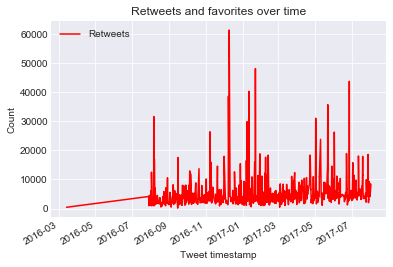

In [62]:
# Plotting Retweet count against timestamp

analyze_df['retweet_count'].plot(color = 'red', label='Retweets')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

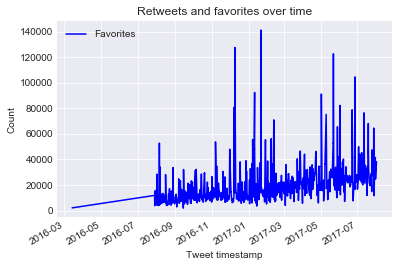

In [63]:
# Plotting Favorite count against timestamp

analyze_df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

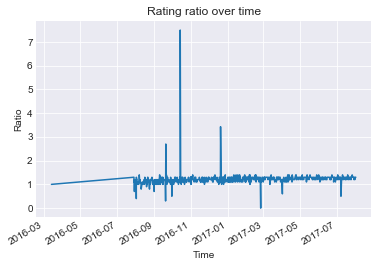

In [64]:
# Plotting rating ratio against time

analyze_df['rating_ratio'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio.png')
plt.show()